# Workshop PR01: Setting up workspace + Intro to data analysis

## Agenda
1. Set up a Python3 working environment and Jupyter Notebook 
2. Data manipulation/preparation with pandas 

## Setting up your workspace

All ML algorithms during the semester would be done with the use of Jupyter Notebook. There are various ways of setting up and using Jupyter Notebook. They are, 

    1. Anaconda on your local machine 
    2. Docker Container 
    3. GCP instance 
The first option is the most easy and convenient way of accessing Jupyter Notebook for any new user. Option 2 and 3 is mostly used for isolated training and high performance training respectively, which is not a necessity of new users at this stage. If anyone does require knowledge on how to set up Jupyter Notebook through option 2 and 3, please consult anyone at MLSA. It is fairly intuitive. I have described below on how to set up Jupyter notebook using option 1. 

#### Option 1: Anaconda on local Machine 

Install Anaconda3 following the link below [link](https://www.anaconda.com/distribution/). Despite being able to install conda packages and setting up environments through the graphical interface on Anaconda, I would strongly advise using the Command Line Interface (CLI)/ terminal at most times. 

First create a specific conda environment:
```
conda create env_name
```
(On Mac)
```
source activate env_name 
```

To install packages to the specific environment there are 2 ways to do it, based up on the package channel you will use. 


a. Install packages from the pip channel   
```
pip3 install pkg_name
```
b. Install package from conda-forge channel 
```
conda-forge install --name env_name -c pkg_name
```

Either option would install the necessary packages at the specified conda environment
Once you set up the conda environment and install the required packages in it, you need to set up a jupyter kernel sourcesd from the specific conda environment you created. To do that simpley do the following, 

```
python -m ipykernel install --user --name my_env --display-name kernel_name
```

To make sure the kernel have been successfully created list the existing jupyter kernels

```
ipython kernelspec list
```

If you made an error while setting the correct conda environment for the kernel you could uninstall the kernel as follows, 

```
jupyter kernelspec uninstall unwanted-kernel
```

Finally, you're able to start up the jupyter server as follows and start writiing python code for any ML algorithm. It is best practice to create a seperate folder for all your ML works, then start the jupyter server at that specific directory. 

```
mkdir machine_learning_workshops
```

Go inside the directory, 

```
cd machine_learning_workshops
```

start up jupyter server, 

```
jupyter notebook 
```

Now when you create a new ipython notebook, always set the kernel to the kernel which you created above to make sure the correct conda environment is being used for your operations through out the notebook. 
    
Thats it!!!

## Understanding your data 

To make things more interesting, we will be using the IEEE fraud detection dateset [(download it here)](https://www.kaggle.com/c/ieee-fraud-detection/data). We will be using the same dataset for the next few workshops, so save your progress for future convenience.   

To better understand our data and prepare it for modelling, `pandas` provides a great extend of flexibility and functionality to analyse and manipulate our data. Here are some of the very common operations that we will be using frequently:

* **Reading the data:** pd.read_csv('path_to_csv')
* **Brief info about the data:** 
    - df.info() 
    - df.describe()
* **Selectiong columns:** df['column_name'] 
* **Selectiong rows:** 
    - df.loc[ith_row:jth_row] 
    - df[some_boolean_mask]
* **Creating new columns:**
    - df['new_column'] = df['col1']+df['col2'], can be fancier obviously 
    - df['new_column'].apply(some_function)



Don't worry if you don't get everything yet. It will be so much more clear when we go through an example. Let's get started! 

### Reading the data

In [1]:
# import pandas, by convention aliased as pd
import pandas as pd

In [2]:
# read csv file into a dataframe
df_id_train = pd.read_csv("train_identity.csv")
df_tran_train = pd.read_csv("train_transaction.csv")
df_id_test = pd.read_csv("test_identity.csv")
df_tran_test = pd.read_csv("test_transaction.csv")

### Brief info about the data

In [4]:
# let's have a little look-see at the data
df_id_train.head() 

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
df_tran_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#df_id_train.info()
df_id_train['TransactionID'].describe()

count    1.442330e+05
mean     3.236329e+06
std      1.788496e+05
min      2.987004e+06
25%      3.077142e+06
50%      3.198818e+06
75%      3.392923e+06
max      3.577534e+06
Name: TransactionID, dtype: float64

In [7]:
#df_tran_train.info()
df_tran_train['TransactionID'].describe()

count    5.905400e+05
mean     3.282270e+06
std      1.704744e+05
min      2.987000e+06
25%      3.134635e+06
50%      3.282270e+06
75%      3.429904e+06
max      3.577539e+06
Name: TransactionID, dtype: float64

There are 2 dataframes, and we need to join them based on Transaction ID to make a giant dataframe.

In [8]:
# joining the 2 dataframes on id

df_train = pd.merge(df_tran_train,df_id_train, on='TransactionID' ,how='left')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [10]:
#just checking whether the join is correct 
df_train['TransactionID'].nunique()

590540

### Selecting columns and rows

We are not feeding the data into the model yet, but just trying to understand the data better.

In [11]:
# selecting the "isFraud" column
IsFraud = df_train['isFraud']
IsFraud.head()
# so these don't tell much information, let's dig a little deeper 

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [12]:
# IsFraud[isFraud==0] is a bunch of true and false masks 
# so we can select the nonfraud entries in the column 
# and count the number of them 
num_nonfraud = IsFraud[IsFraud==0].count()
num_fraud = IsFraud[IsFraud==1].count()
assert num_nonfraud+num_fraud == IsFraud.count()

print("There are {} fraud transactions out of {} transactions.".format(num_fraud,num_fraud+num_nonfraud))


There are 20663 transactions out of 590540 transactions.


In [13]:
# the masks can also be used for dataframes
# for dataframe, it will select the rows that are masked
Fraud = df_train[df_train['isFraud']==1]
Fraud.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,chrome 62.0 for ios,NaN,NaN,NaN,F,F,F,F,mobile,NaN


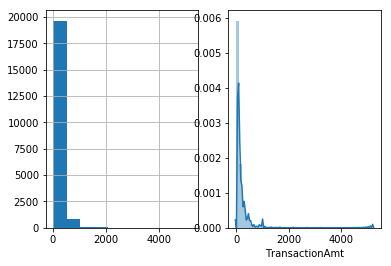

In [15]:
# now just for curiosity's sake, 
# let's plot the TransactionAmt distribution fot the fraud transactions
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
Fraud['TransactionAmt'].hist()
plt.subplot(1, 2, 2)
sns.distplot(Fraud['TransactionAmt'])

### Creating new columns 

In [16]:
# sometimes we might want customised functions to select or create our columns
# for example, instead of just fraud or nonfraud we want to select the high transaction amount
def tran_amt_is_high (TransactionAmt):
    return TransactionAmt >= 1000

In [17]:
df_train['HighTranAmt'] = df_train['TransactionAmt'].apply(tran_amt_is_high)

In [18]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,HighTranAmt
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,False


That's it! Next workshop we will prepare the data for model training! 